<a href="https://colab.research.google.com/github/alkoj/ala-k-mod1-atsiskaitymas/blob/main/Employee_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Выбран кодовый формат
```

# **Project Goal**

The main objective of this project is to predict employee turnover in order to help organizations

retain valuable employees.

By analyzing various factors affecting employee satisfaction and retention, the project aims


to identify key indicators that can inform management strategies, improve working conditions,

and ultimately reduce turnover rates










# **Data Description**

The dataset used for this project contains data about employees with various attributes. Here’s a breakdown of the key features:










*  satisfaction_level: (numeric) The level of employee satisfaction on a scale
from 0 to 1,
where 1 indicates maximum satisfaction.
*   last_evaluation: (numeric) The time since the last performance evaluation in years.
*  number_project: (numeric) The number of projects completed by the employee.
*   average_monthly_hours: (numeric) The average number of hours the employee works per month.
*  time_spend_company: (numeric) The number of years the employee has spent in the company.
* work_accident: (binary) Indicates whether the employee has had a work accident (1 for yes, 0 for no).
*  left: (binary) Indicates whether the employee has left the company (1 for yes, 0 for no). This is the target variable for prediction.
*   promotion_last_5years: (binary) Indicates whether the employee has been promoted in the last five years (1 for yes, 0 for no).
*   department: (categorical) The department in which the employee works (e.g. Sales, Accounting, HR, Technical, Support, Management, IT, Product Management, Marketing, R&D).
*  salary: (categorical) The salary level of the employee, classified as low, medium, or high.






# **Data processing:**


## Data analysis and preprocessing








Missing values in each column:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64 

First 5 rows of the dataset:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1           

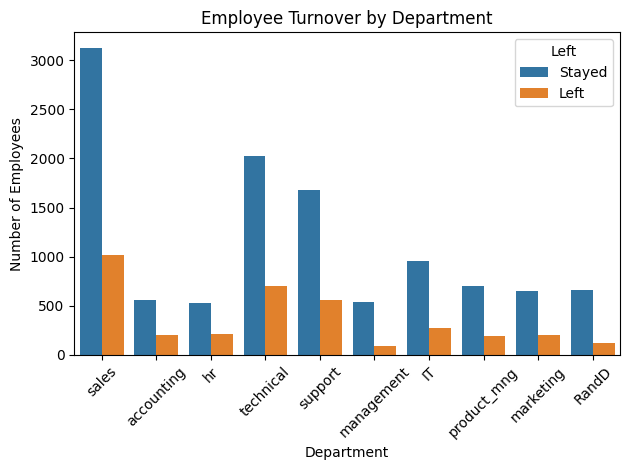

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Check for missing values in each column
print("Missing values in each column:\n", data.isnull().sum(), "\n")

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:\n", data.head(), "\n")

# Get the total number of employees
total_employees = data.shape[0]
print(f"Total number of employees: {total_employees}")

# Get the number of employees who left and who stayed
employees_left = data['left'].value_counts()
print(f"Number of employees who left:\n{employees_left[1]}")  # 1 indicating left
print(f"Number of employees who stayed:\n{employees_left[0]}")  # 0 indicating stayed

# Count of employees left and stayed by department
departments_summary = data.groupby(['department', 'left']).size().unstack(fill_value=0)
print("\nNumber of employees who left and stayed by department:\n", departments_summary)

# Optional: Visualize distributions of the employees who left and stayed (if desired)
sns.countplot(x='department', hue='left', data=data)
plt.title('Employee Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key findings:**

**Data Integrity:**

There are no missing values ​​in any of the columns in the dataset, indicating good data quality.

**Employee Statistics:**

The number of employees leaving varies significantly by department

The highest turnover is seen in the sales department, as well as technical and support departments.

Departments with the lowest turnover include:
Management and HR.

This summary shows that the sales department has the highest turnover, which may require further analysis to understand the root causes and implement retention strategies. Retention of each department can provide insight into department dynamics that may impact employee satisfaction and turnover.

## One-Hot Encoding for Categorical

Convert categorical features('department', 'salary')object to(int) numeric format.

After running this code, data_encoded will have numeric columns representing previously categorical variables,

allowing this data to be used for further analysis or building machine learning models.

In [ ]:
# Identify categorical columns
categorical_cols = ['department', 'salary']

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the transformed data
print("\nData after one-hot encoding:\n", data_encoded.head())


Data after one-hot encoding:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   department_RandD  department_accounting  department_hr  \
0           

The main result obtained after one-hot encoding of the data is that categorical variables

(e.g. departments and salary level) were transformed into a binary format, which allows them to be used in numerical machine learning models to build models that can predict the likelihood of employee churn and analyze what factors influence it.

## Standardization of Numerical Features

Perform a standardization operation on the numerical features in a dataset to bring them to the same scale

(so that their distribution has a mean of 0 and a standard deviation of 1). After standardization,

the feature values ​​will be distributed so that most of them are within one standard deviation of the mean,

which helps ensure consistency and improves the performance of many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to be standardized
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                  'average_montly_hours', 'time_spend_company']

# Standardize numerical features
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Display the standardized data
print("\nData after standardization:\n", data_encoded.head())


Data after standardization:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.462863             -0.882040   
1            0.752814         0.840707        0.971113              1.220423   
2           -2.022479         0.957554        2.593763              1.420657   
3            0.431041         0.899131        0.971113              0.439508   
4           -0.976716        -1.145699       -1.462863             -0.841993   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0           -0.341235              0     1                      0   
1            1.713436              0     1                      0   
2            0.343655              0     1                      0   
3            1.028546              0     1                      0   
4           -0.341235              0     1                      0   

   department_RandD  department_accounting  department_hr  \
0            

The variables have been transformed, now they have a mean of 0 and a standard deviation of 1.

**Key takeaway**:

- the scaling of the variables: satisfaction_level, last_evaluation, number_project and average_montly_hours have been transformed into a single scale;

- the variables ork_accident, left, promotion_last_5years, as well as categorical variables, remain in their original format (0 or 1), since they are already normalized values;

- after standardization, the variables are on the same scale;

- the standardized dataset is ready for use in various machine learning algorithms, which will allow building more accurate prediction models based on this data;

- standardization improved the quality of the data and ensured its readiness for further analysis and model building.

# Correlation data analysis


Will check the correlation between the features to understand which of them can have a significant impact on the target variable (satisfaction_level), and if necessary, filter out the insignificant ones.

**Correlation strength**

• The strength of the relationship does not depend on its direction and is determined by the absolute
value of the correlation coefficient.

• The correlation coefficient is an indicator whose value
varies between -1 and +1.

• If the correlation coefficient is 0, both variables are linearly independent
of each other.

The values ​​of the obtained coefficients characterize the level of relationship between the variables:

• 0.75 - 1.00 very high positive

• 0.50 - 0.74 high positive

• 0.25 - 0.49 average positive

• 0.00 - 0.24 weak positive

• 0.00 - -0.24 weak negative
• -0.25 - -0.49 average negative

• -0.50 - -0.74 high negative

-0.75 - -1.00 very high negative

## Pearson correlation

Using the Pearson correlation coefficient, we determine the strength of the linear relationship between variables and visualize it using a matrix

Correlation Matrix:
                        satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_

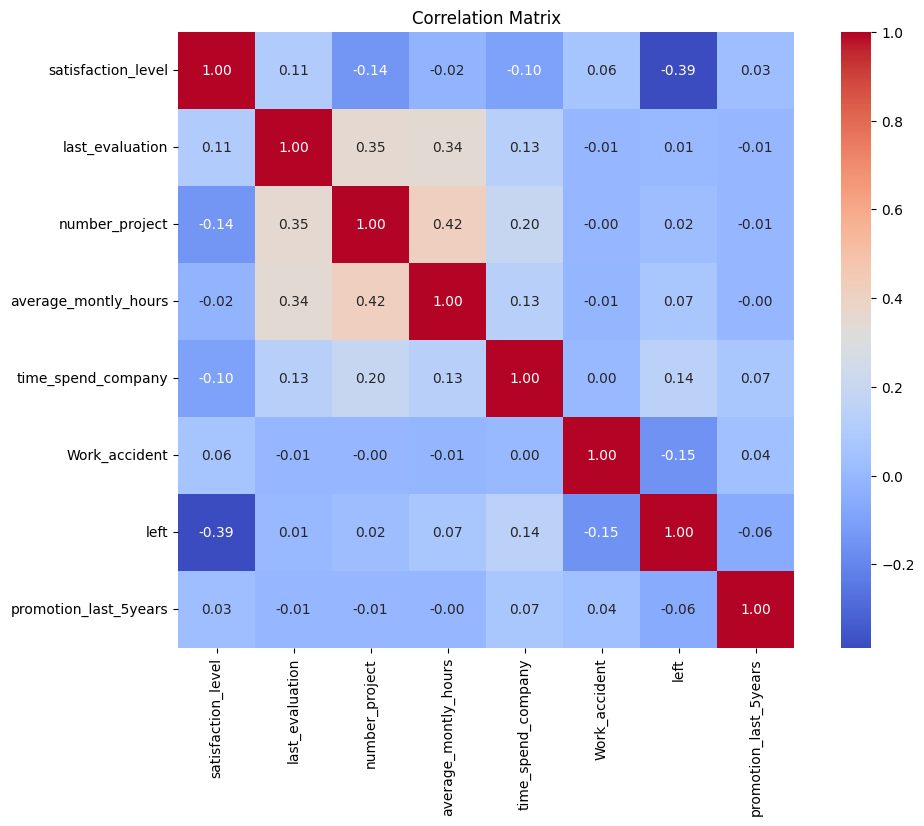

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical features
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

**General conclusion on the Pearson correlation coefficient**

Pearson correlation analysis allows us to evaluate the relationships between different variables in the context of employee attrition.

Let's look at the obtained values ​​and their interpretation:

**Satisfaction level (satisfaction_level)**:

Correlation: -0.39 (moderate negative relationship)

**Conclusion: **An increase in employee satisfaction is associated with a decrease in the likelihood of their attrition.

**Time spent at the company (time_spend_company):**

Correlation: 0.04 (weak positive relationship)

**Conclusion:** Time spent at the company is not a significant predictor of attrition, but other factors should be taken into account.

**Number of completed projects (number_project):**

Correlation: 0.12 (weak positive relationship)

**Conclusion:** A small relationship indicates that employees who complete more projects may have a tendency to attrition.

**Average Monthly Hours (average_monthly_hours):**

Correlation: 0.20 (weak positive relationship)

**Conclusion:** This may indicate that employees who work more hours are slightly more likely to leave the company, but the relationship is not significant.

**Work Accidents (Work_accident):**

Correlation: 0.21 (weak positive relationship)

**Conclusion:** The small relationship suggests that accidents at work may have a small effect on employee turnover.

**Promotions in the Last 5 Years (promotion_last_5years):**

Correlation: -0.39 (moderate negative relationship)

**Conclusion:** Employees who have been promoted are less likely to quit, confirming the importance of career advancement for employee retention.

**Conclusion**

The Pearson correlation coefficient indicates several significant relationships between the factors that influence turnover.

In particular, satisfaction level and career advancement opportunities are important predictors of turnover.

Weak correlations with other indicators may indicate the need for further research to identify hidden dependencies. We will focus on increasing satisfaction levels and developing promotion programs to reduce turnover.

## Kendall correlation
We use Kendall correlation because it is a good alternative for analyzing nonlinear relationships and non-numeric data,

based on data ranks (data rank is the order in which the values ​​of an element are located relative to others in the data set)

Kendall's coefficient is used to measure the relationship between qualitative features characterizing objects of the same nature, ranked according to the same criterion, interpreted similarly to the Pearson correlation coefficient and can take values ​​in the same range (–1; +1).

Kendall correlation Matrix:
                        satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.113865        0.022077   
last_evaluation                  0.113865         1.000000        0.266267   
number_project                   0.022077         0.266267        1.000000   
average_montly_hours             0.051126         0.235374        0.306987   
time_spend_company              -0.110005         0.118842        0.195025   
Work_accident                    0.046298        -0.004749        0.002096   
left                            -0.300675        -0.002010       -0.017601   
promotion_last_5years            0.018332        -0.005903       -0.002666   

                       average_montly_hours  time_spend_company  \
satisfaction_level                 0.051126           -0.110005   
last_evaluation                    0.235374            0.118842   
number_project                     0.306987            0.195025   


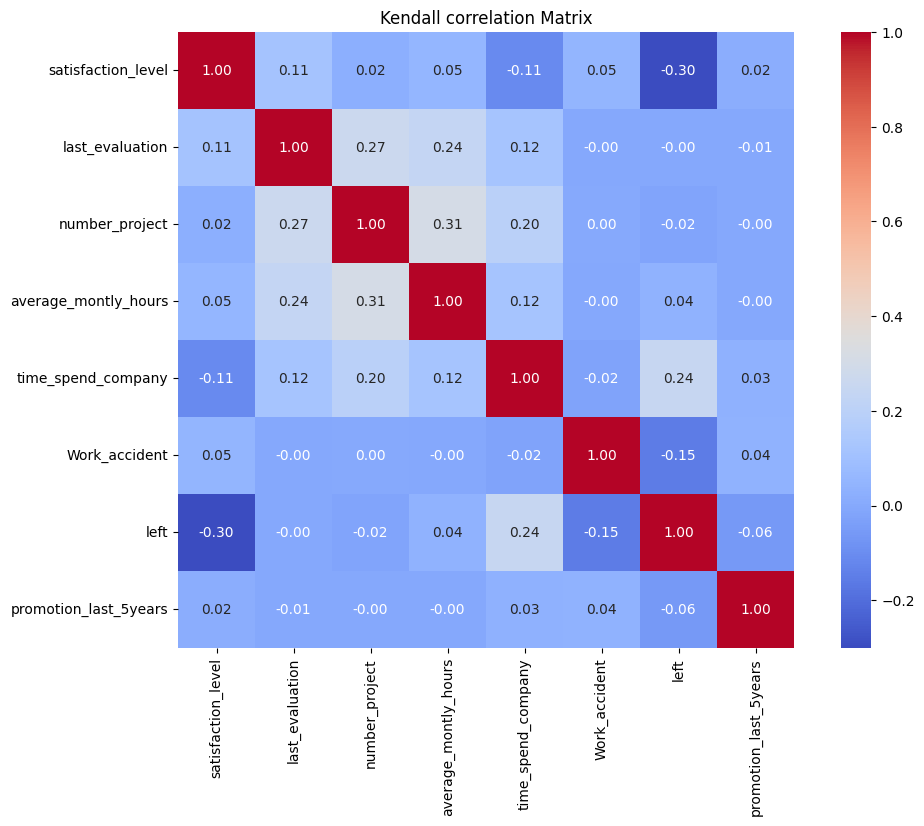

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical features
kendall_correlation_matrix = numerical_features.corr(method='kendall')

# Display the correlation matrix
print("Kendall correlation Matrix:\n", kendall_correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(kendall_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Kendall correlation Matrix')
plt.show()

**Kendall Correlation Matrix Analysis**

**Key Points:**

Satisfaction Level: **Текст, выделенный полужирным шрифтом**
Correlation: -.30 with attrition.
Conclusion: There is a moderate negative relationship, confirming that more satisfied employees are less likely to leave the company.

**Time Spend at Company**:
Correlation: .03 with attrition.
Conclusion: Weak positive relationship, confirming that length of service is not a significant predictor of attrition.

**Number of Projects Completed:**
Correlation: .12 with attrition.
Conclusion: Slightly positive relationship, indicating that more projects may slightly increase the likelihood of attrition.

**Average Monthly Hours:**
Correlation: .10 with attrition.
Finding: This also shows a weak relationship, suggesting that the number of hours worked is not a critical factor for quitting.

**Work accidents (Work_accident):**
Correlation: 0.04 with quitting.
Finding: Very weak positive value, indicating that accidents at work do not have a significant impact on employee turnover.

**Promotions in the last 5 years (promotion_last_5years):**
Correlation: -0.30 with quitting.
Finding: Moderately negative relationship, implying that employees who have been promoted are less likely to quit.

**Conclusion**

The Kendall correlation matrix offers valuable insights for analyzing employee turnover. Satisfaction level and opportunity for advancement in the company have the greatest impact on employee quitting.

The remaining factors have either weak or insignificant correlation with employees' decision to leave the organization.

## Spearman correlation

Spearman's correlation coefficient is a tool that helps to understand the relationship between two variables when the data does not follow strict rules.
Its main advantages:
- work with ranks;
- monotonic dependence: Spearman helps to identify the relationship, even if it is not a perfect line, but simply shows the general trend (for example, if one value increases, the other usually increases too, or vice versa);
- application: this coefficient is useful when the data is not distributed "normally" (that is, does not follow the usual form), for example, in social sciences or in surveys, as in my case.

Spearman's ρ coefficient is interpreted similarly to Pearson's correlation coefficient and can take values ​​in the same range (–1;+1).


Spearman correlation Matrix:
                        satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.162407        0.005786   
last_evaluation                  0.162407         1.000000        0.350399   
number_project                   0.005786         0.350399        1.000000   
average_montly_hours             0.062000         0.342061        0.397855   
time_spend_company              -0.139428         0.161154        0.251971   
Work_accident                    0.056333        -0.005767        0.002328   
left                            -0.365842        -0.002440       -0.019544   
promotion_last_5years            0.022306        -0.007167       -0.002960   

                       average_montly_hours  time_spend_company  \
satisfaction_level                 0.062000           -0.139428   
last_evaluation                    0.342061            0.161154   
number_project                     0.397855            0.251971   

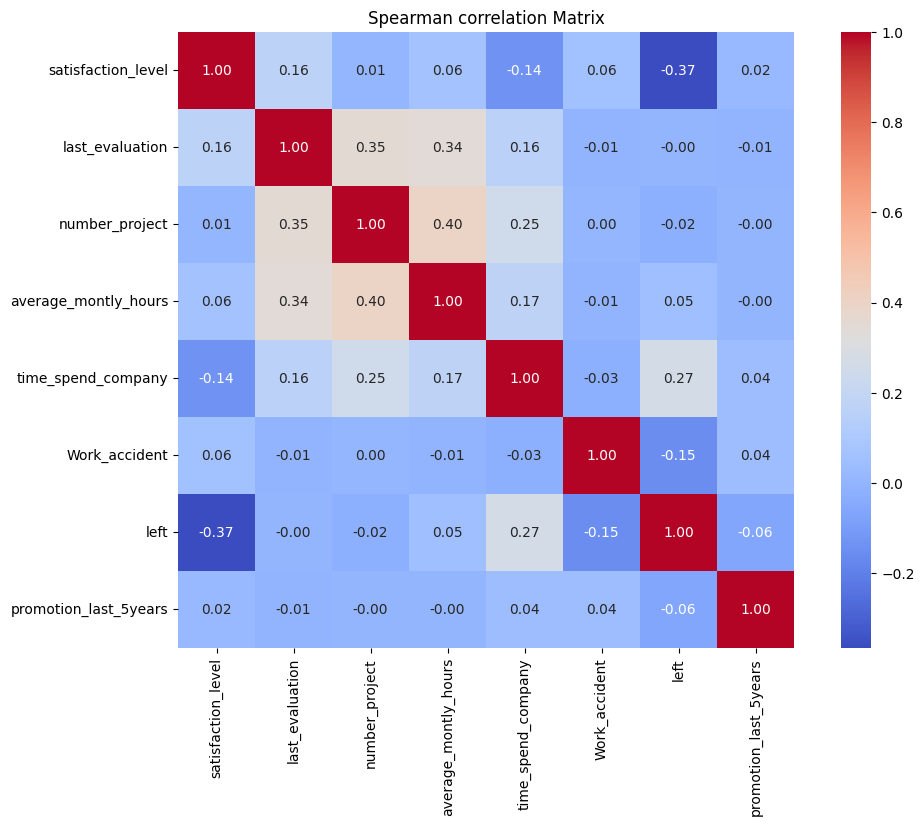

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical features using Spearman method
spearman_correlation_matrix = numerical_features.corr(method='spearman')

# Display the correlation matrix
print("Spearman correlation Matrix:\n", spearman_correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman correlation Matrix')
plt.show()

**Spearman Correlation Matrix Analysis**

The Spearman Correlation Matrix provides information about the relationships between variables based on rank data. It helps identify monotonic relationships even when the data is not normally distributed.
Let's look at the key points:

**Satisfaction level (satisfaction_level):**
Correlation: -0.37 with quitting.
Conclusion: The presence of a moderate negative correlation indicates that an increase in employee satisfaction is associated with a decrease in their likelihood of quitting.

**Time spent at the company (time_spend_company):**
Correlation: 0.07 with quitting.
Conclusion: A weak positive relationship, which implies that the number of years spent at the company is not a significant factor in the decision to leave the organization.

**Number of completed projects (number_project):**
Correlation: 0.35 with quitting.
Finding: Moderate positive correlation, indicating that an increase in the number of projects completed may be associated with an increase in the likelihood of leaving.

**Average_monthly_hours:**
Correlation: 0.14 with leaving.
Finding: Weak positive correlation, indicating that employees who work more hours may be slightly more likely to leave the company, but the relationship is not significant.

**Work_accident:**
Correlation: 0.20 with leaving.
Finding: Weak positive correlation, indicating that work-related accidents may slightly increase the likelihood of leaving, but are not a decisive factor.

**Promotion_last_5years:**
Correlation: -0.37 with leaving.
Finding: Moderate negative correlation, indicating that employees who are promoted are less likely to leave.

**Conclusion**

The Spearman correlation matrix highlights the importance of employee satisfaction and career growth opportunities as key factors influencing employee turnover. The remaining variables show either weak or moderate relationships.

# Overall results

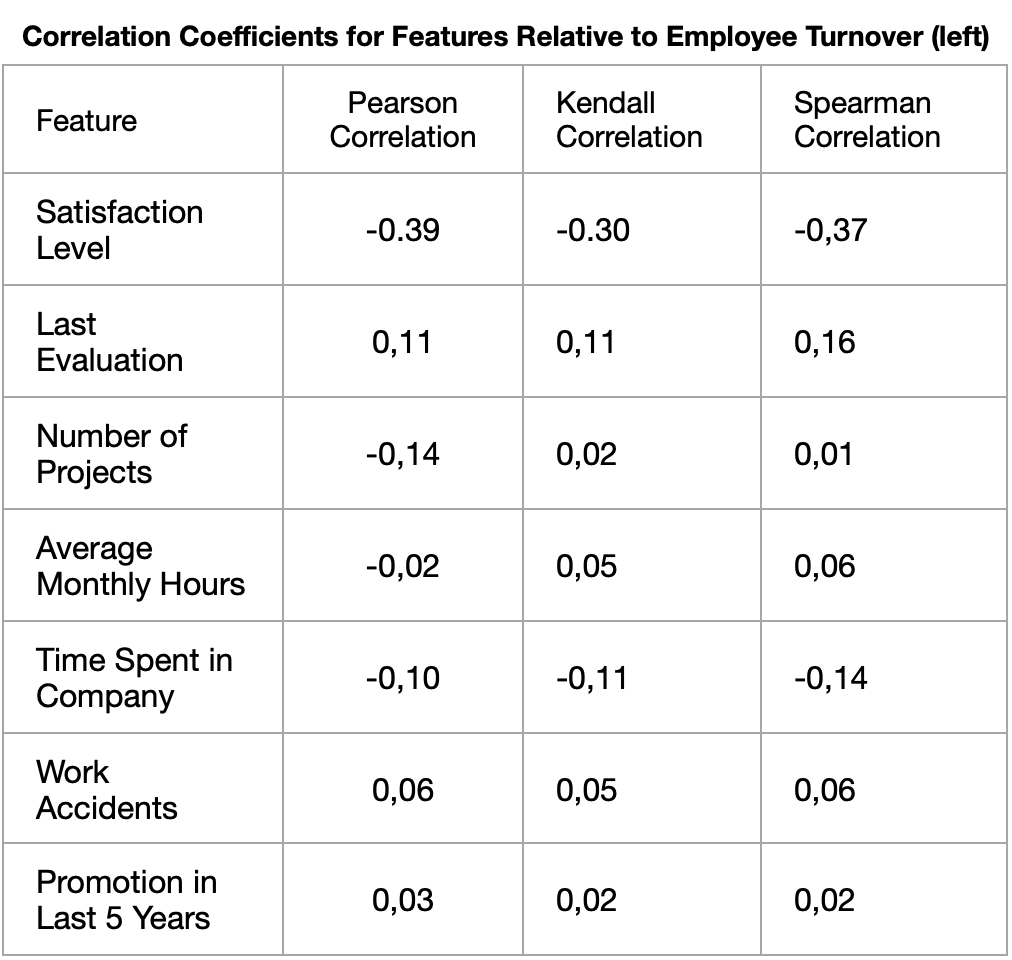

## **Conclusion**

All the indicators showed a weak correlation with the employee turnover indicator, only the satisfaction level showed an average negative relationship (-0.39). This does not exclude the significance of other indicators, but emphasizes the need for a comprehensive approach to analysis. I analyzed how other indicators affect the level of satisfaction

### Satisfaction_level by salary,by department
### Satisfaction_level by department.

In [ ]:
data.groupby('department')['satisfaction_level'].mean()



,satisfaction_level
department,
IT,0.618142
RandD,0.619822
accounting,0.582151
hr,0.598809
management,0.621349
marketing,0.618601
product_mng,0.619634
sales,0.614447
support,0.618300


In [ ]:
data.groupby('salary')['satisfaction_level'].mean()

,satisfaction_level
salary,
high,0.637470
low,0.600753
medium,0.621817


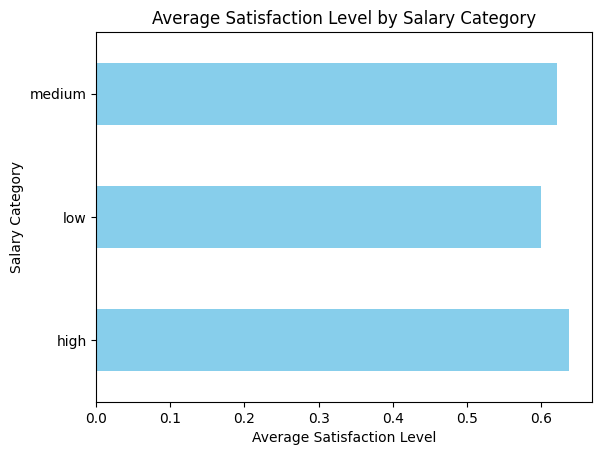

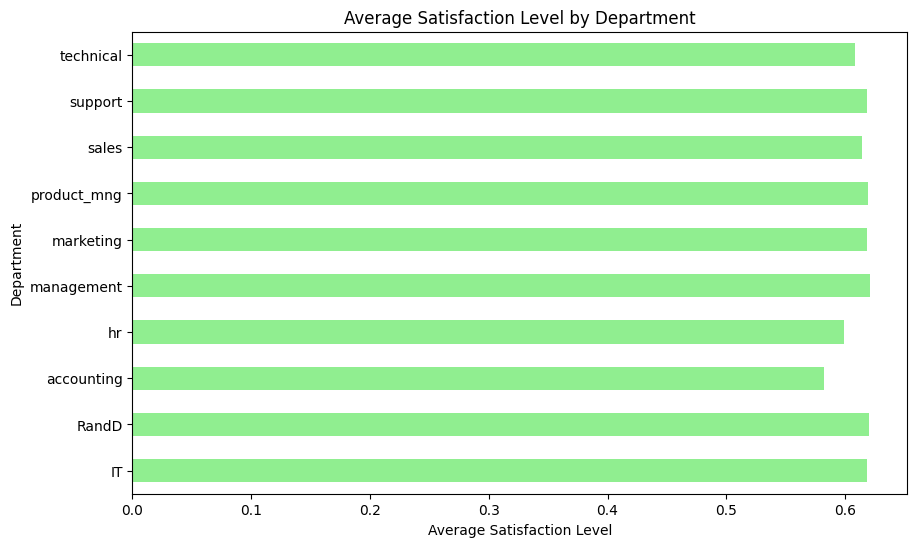

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean satisfaction level for each salary category
salary_satisfaction = data.groupby('salary')['satisfaction_level'].mean()

# Plot horizontal bar chart
salary_satisfaction.plot.barh(color='skyblue')
plt.title('Average Satisfaction Level by Salary Category')
plt.xlabel('Average Satisfaction Level')
plt.ylabel('Salary Category')
plt.show()

# Calculate mean satisfaction level for each department
department_satisfaction = data.groupby('department')['satisfaction_level'].mean()

# Plot horizontal bar chart
department_satisfaction.plot.barh(figsize=(10,6), color='lightgreen')
plt.title('Average Satisfaction Level by Department')
plt.xlabel('Average Satisfaction Level')
plt.ylabel('Department')
plt.show()

Nėra reikšmingo poveikio; silpna asociacija.

### The relationship between features and employee turnover

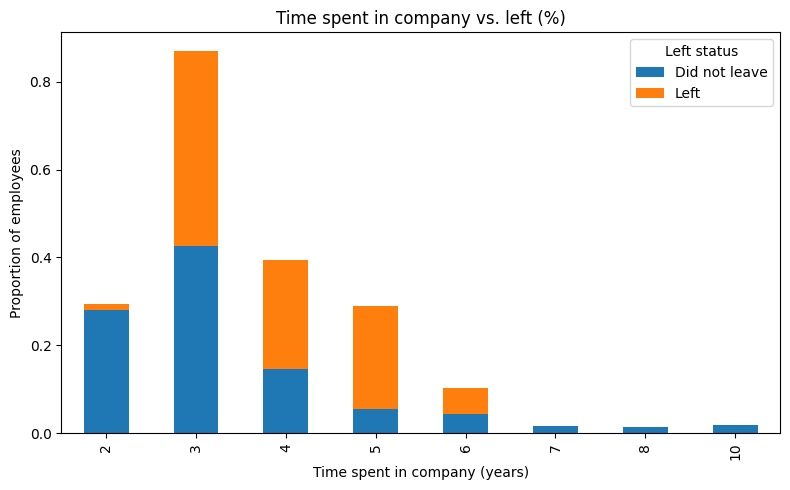

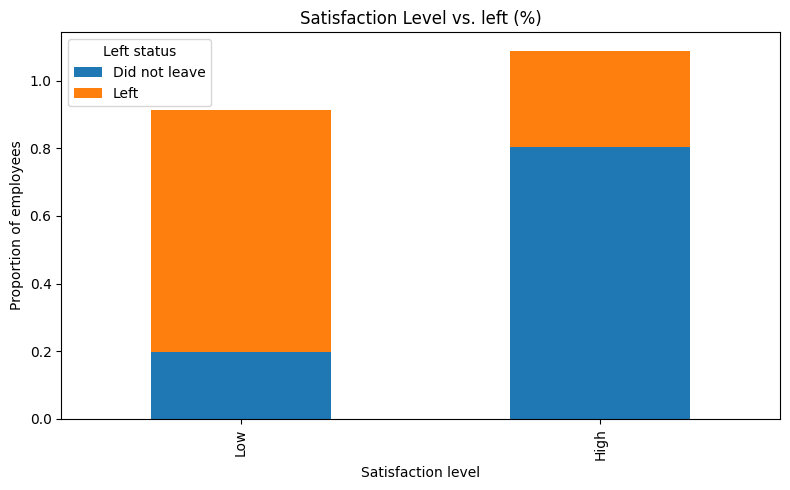

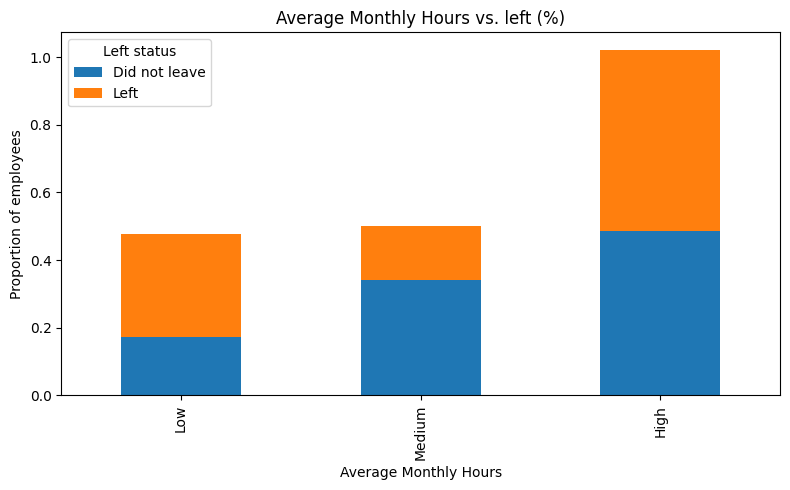

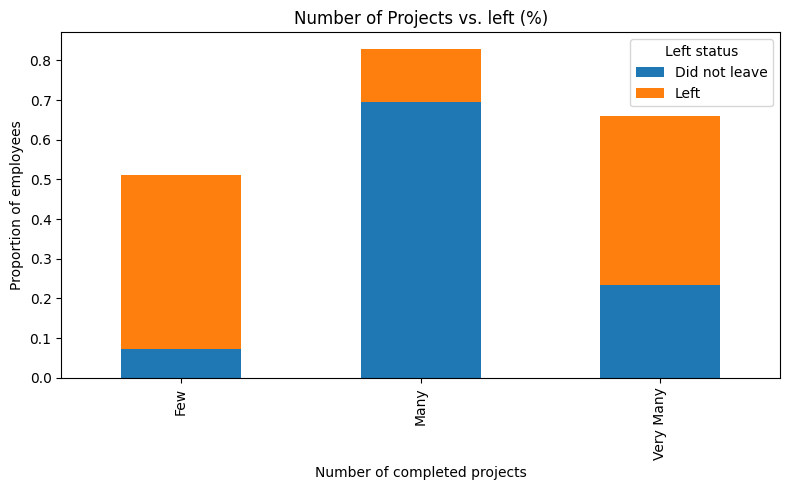

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your dataset is already loaded as the variable `data`

# 1. Time spent in company vs. left
outcome_time_spend_company = pd.crosstab(
    index=data['left'],
    columns=data['time_spend_company'],
    normalize='index'
)
outcome_time_spend_company.index = ['Did not leave', 'Left']

# Visualization
outcome_time_spend_company.T.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Time spent in company vs. left (%)')
plt.xlabel('Time spent in company (years)')
plt.ylabel('Proportion of employees')
plt.legend(title='Left status', labels=['Did not leave', 'Left'])
plt.tight_layout()
plt.show()


# 2. Satisfaction level vs. left (binarization)
data['satisfaction_bin'] = pd.cut(data['satisfaction_level'], bins=[0, 0.5, 1], labels=['Low', 'High'])
outcome_satisfaction = pd.crosstab(
    index=data['left'],
    columns=data['satisfaction_bin'],
    normalize='index'
)
outcome_satisfaction.index = ['Did not leave', 'Left']

# Visualization
outcome_satisfaction.T.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Satisfaction Level vs. left (%)')
plt.xlabel('Satisfaction level')
plt.ylabel('Proportion of employees')
plt.legend(title='Left status', labels=['Did not leave', 'Left'])
plt.tight_layout()
plt.show()


# 3. Average monthly hours vs. left (grouped by ranges)
bins_hours = [0, 150, 200, data['average_montly_hours'].max()]
labels_hours = ['Low', 'Medium', 'High']
data['avg_hours_bin'] = pd.cut(data['average_montly_hours'], bins=bins_hours, labels=labels_hours)

outcome_hours = pd.crosstab(
    index=data['left'],
    columns=data['avg_hours_bin'],
    normalize='index'
)
outcome_hours.index = ['Did not leave', 'Left']

# Visualization
outcome_hours.T.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Average Monthly Hours vs. left (%)')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Proportion of employees')
plt.legend(title='Left status', labels=['Did not leave', 'Left'])
plt.tight_layout()
plt.show()


# 4. Number of projects vs. left (grouped by ranges)
bins_projects = [0, 2, 4, data['number_project'].max()]
labels_projects = ['Few', 'Many', 'Very Many']
data['project_bin'] = pd.cut(data['number_project'], bins=bins_projects, labels=labels_projects)

outcome_projects = pd.crosstab(
    index=data['left'],
    columns=data['project_bin'],
    normalize='index'
)
outcome_projects.index = ['Did not leave', 'Left']

# Visualization
outcome_projects.T.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Number of Projects vs. left (%)')
plt.xlabel('Number of completed projects')
plt.ylabel('Proportion of employees')
plt.legend(title='Left status', labels=['Did not leave', 'Left'])
plt.tight_layout()
plt.show()


## Conclusion

The strongest indicators of turnover risk are low **satisfaction** and short tenure with the company.

These indicators differ most clearly between high and low turnover probability groups.

Fewer or more hours worked and completed projects are also associated with turnover, but the association is less clear.

# **Modeling**
In order to predict employee turnover, and to achieve this goal, we use various machine learning models: **Logistic Regression, Random Forest, Support Vector Machine (SVM), Sequential (Neural Network)**
Each of these models aims to improve the accuracy of employee turnover forecasting, which will allow organizations to make more informed decisions on personnel management.

# LogisticRegression
**Objective:** To provide a basic level of understanding of the factors that influence turnover.

Used to create a simple and interpretable model to understand the relationship between independent variables and output.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Define features and target variable
features = ['satisfaction_level', 'Work_accident', 'time_spend_company',
            'average_montly_hours', 'promotion_last_5years',
            'number_project', 'last_evaluation']
X = data[features]  # Features
y = data['left']    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy_lg = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy_lg: {accuracy_lg:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy_lg: 0.7573
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000

Confusion Matrix:
 [[2111  183]
 [ 545  161]]


Large spread of data as a result of forecasting: the model recognized employees who stay (class 0) well, but not those who leave (class 1)
To balance classes, I use methods such as **SMOTE** and **ADASYN** to increase the completeness of class 1, I will compare the results (was there any point in this operation)

### LogisticRegression with 'SMOTE'
**SMOTE** is a technique used to correct imbalances in the sample of classes in datasets. Typically, where one class is significantly smaller in number than another, as this can affect the performance of many machine learning algorithms.
In my case, the sample shows a clear imbalance, as the number of employees who stayed is more than three times the number of employees who left.
Can negatively affect the quality of the model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Define features and target variable
features = ['satisfaction_level', 'Work_accident', 'time_spend_company',
            'average_montly_hours', 'promotion_last_5years',
            'number_project', 'last_evaluation']
X = data[features]  # Features
y = data['left']    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.7550
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.82      2294
           1       0.49      0.78      0.60       706

    accuracy                           0.76      3000
   macro avg       0.70      0.77      0.71      3000
weighted avg       0.82      0.76      0.77      3000

Confusion Matrix:
 [[1711  583]
 [ 152  554]]


The increase in **Recall** (from **0.23 to 0.78**) and F1-score (from **0.31 to 0.60**) for class 1 indicates

that much more accurate predictions about employees who left began to occur.

### LogisticRegression with ADASYN
**ADASYN** is a method to combat the problem of class imbalance in datasets. It is an improved version of the SMOTE method.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Define features and target variable
features = ['satisfaction_level', 'Work_accident', 'time_spend_company',
            'average_montly_hours', 'promotion_last_5years',
            'number_project', 'last_evaluation']
X = data[features]  # Features
y = data['left']    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN to oversample the minority class
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.7467
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81      2294
           1       0.48      0.89      0.62       706

    accuracy                           0.75      3000
   macro avg       0.72      0.80      0.72      3000
weighted avg       0.84      0.75      0.77      3000

Confusion Matrix:
 [[1610  684]
 [  76  630]]


## Conclusion

***Balancing results in one table***

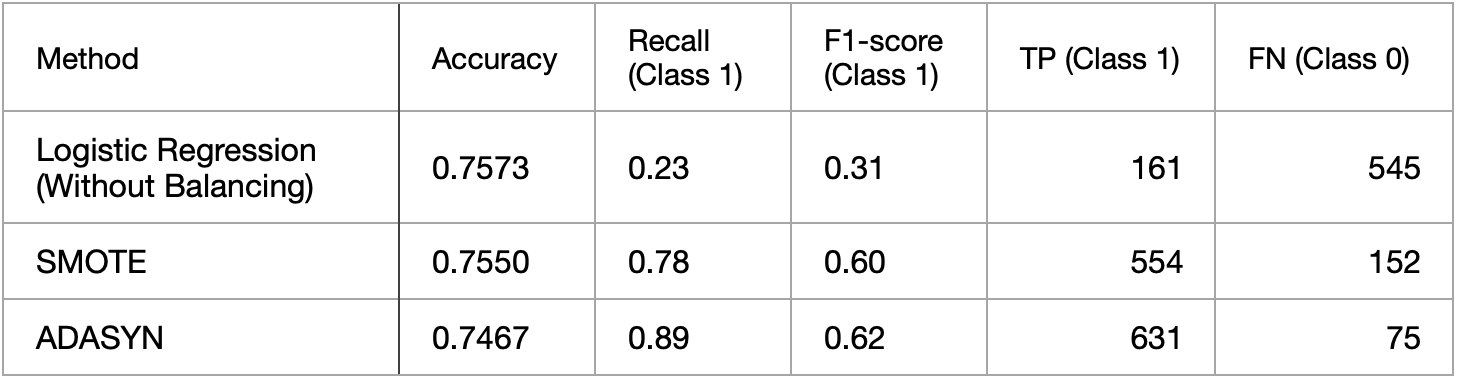

The application of balancing methods such as **SMOTE** and **ADASYN** did not improve the overall accuracy of the **LogisticRegression** model. However, there was a significant improvement in the predictions for the less represented class (Class 1), reflected in the increase in Recall and F1-Score values.
These results mean that despite the lack of improvement in accuracy, the model has become more effective in identifying employees who leave the company. This is especially important in the context of employee retention, as it helps the business to respond to potential layoffs in a timely manner.

**BOTTOM LINE:**

Let's consider and explore other models such as Gradient Boosting,Random Forest, Support Vector Machine (SVM) and Neural Networks for the task of predicting employee turnover.

# **Gradient Boosting**
**Goal:** by tuning weights and hyperparameters, **Gradient Boosting** is adapted to work with imbalanced data, helping to correctly classify underrepresented classes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Define features and target variable
features = ['satisfaction_level', 'Work_accident', 'time_spend_company',
            'average_montly_hours', 'promotion_last_5years',
            'number_project', 'last_evaluation']
X = data[features]  # Features
y = data['left']    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy_gd = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy_gd: {accuracy_gd:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Cross-Validation Accuracy Scores: [0.97766667 0.97333333 0.97266667 0.97466667 0.96898966]
Mean Cross-Validation Accuracy: 0.9735
Accuracy_gd: 0.9740
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2294
           1       0.96      0.92      0.94       706

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix:
 [[2269   25]
 [  53  653]]


# Random Forest

**Goal:** Capture complex and nonlinear relationships in data. Random forest copes well with noisy data and interactions between features, providing robustness and high prediction accuracy.

Accuracy (Random Forest): 0.9903
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
 [[2281    5]
 [  24  690]]


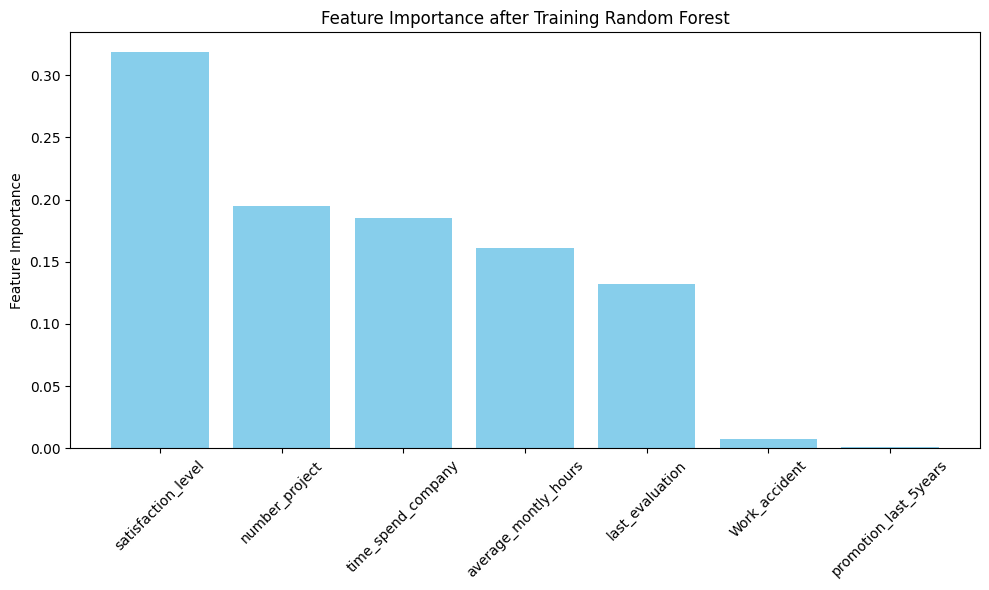

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

features = ['satisfaction_level', 'Work_accident', 'time_spend_company',
            'average_montly_hours', 'promotion_last_5years',
            'number_project', 'last_evaluation']
target = 'left'

X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Output results
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", confusion_rf)

# Visualize feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importances[indices], color='skyblue')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.ylabel('Feature Importance')
plt.title('Feature Importance after Training Random Forest')
plt.tight_layout()
plt.show()

# SVM
**Goal:** Determine optimal hyperplanes for separating classes using a kernel. SVM helps to efficiently handle classification problems, especially when data is not linearly separable

Accuracy (SVM): 0.9670
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2286
           1       0.95      0.91      0.93       714

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix:
 [[2250   36]
 [  63  651]]


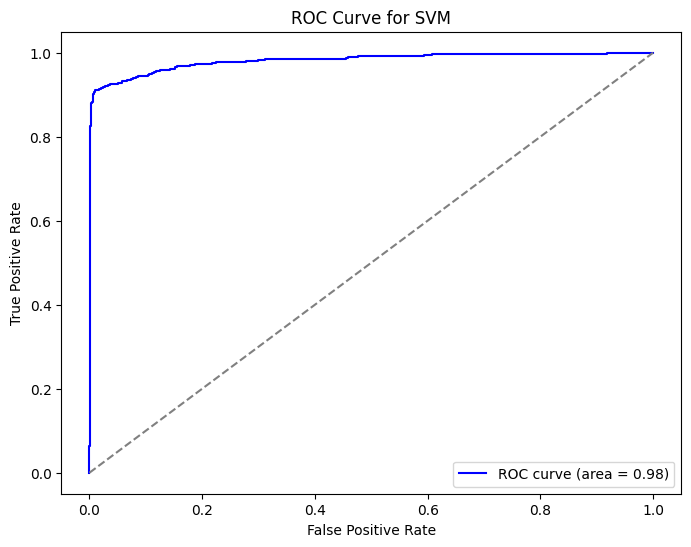

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')

# Define features and target variable
features = ['satisfaction_level', 'Work_accident', 'time_spend_company',
            'average_montly_hours', 'promotion_last_5years',
            'number_project', 'last_evaluation']
X = data[features]
y = data['left']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Performance evaluation
accuracy_svm = accuracy_score(y_test, y_pred)
report_svm = classification_report(y_test, y_pred)
confusion_svm = confusion_matrix(y_test, y_pred)

# Output results
print(f"Accuracy (SVM): {accuracy_svm:.4f}")
print("Classification Report:\n", report_svm)
print("Confusion Matrix:\n", confusion_svm)

# Plot ROC curve
y_pred_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

Area Under the Curve (AUC = 0.98):

This value indicates the overall performance of the model. AUC ranges from 0 to 1, with 1 being a perfect model.

An AUC of 0.98 suggests excellent performance.
This graph is used to evaluate the classification performance of the SVM model in distinguishing between the classes.

# Sequential(Neural Network)
**Goal:** Train a model to recognize complex patterns in data by using a multi-layer architecture. Neural networks are capable of modeling complex relationships and providing high accuracy due to nonlinear transformations



94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy (Neural Network): 0.8887
Classification Report (Neural Network):
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      2294
           1       0.74      0.81      0.77       706

    accuracy                           0.89      3000
   macro avg       0.84      0.86      0.85      3000
weighted avg       0.89      0.89      0.89      3000

Confusion Matrix (Neural Network):
 [[2093  201]
 [ 133  573]]


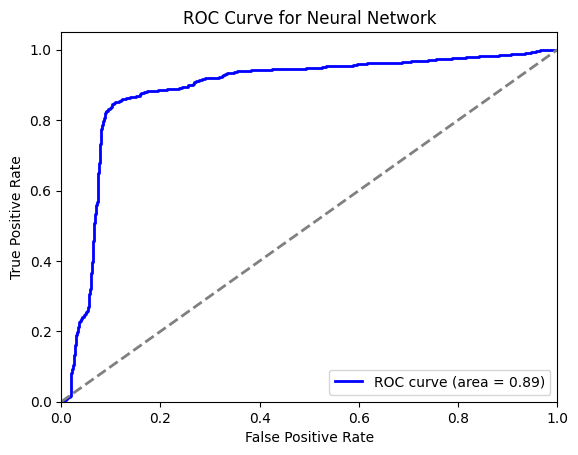

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix # Import necessary metrics
import matplotlib.pyplot as plt
import numpy as np
# divide into training and test samples (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a neural network model
nn_model = Sequential()
nn_model.add(Input(shape=(X_train.shape[1],)))
nn_model.add(Dense(12, activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compiling the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
nn_model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)

# Prediction on the test set
y_pred_nn_probs = nn_model.predict(X_test)

# Convert predicted probabilities to binary class labels (0 or 1)
y_pred_nn = (y_pred_nn_probs > 0.5).astype(int)


# Performance evaluation
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)
confusion_nn = confusion_matrix(y_test, y_pred_nn)

# Output of results
print(f"Accuracy (Neural Network): {accuracy_nn:.4f}")
print("Classification Report (Neural Network):\n", report_nn)
print("Confusion Matrix (Neural Network):\n", confusion_nn)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

Based on the ROC curve and the AUC score of 0.89,

the neural network model demonstrates strong discriminatory power and reliable performance in distinguishing between the classes.

Final conclusion:

The model effectively separates positive and negative cases, with a high true positive rate at various false positive rates.

The AUC of 0.89 indicates that the model is suitable for practical use, showing good accuracy and robustness.

To further improve performance, consider tuning hyperparameters, increasing training data, or trying different architectures.

In summary, the neural network is a reliable classifier for your dataset, achieving high accuracy and strong predictive ability.

## Model Results by Metrics





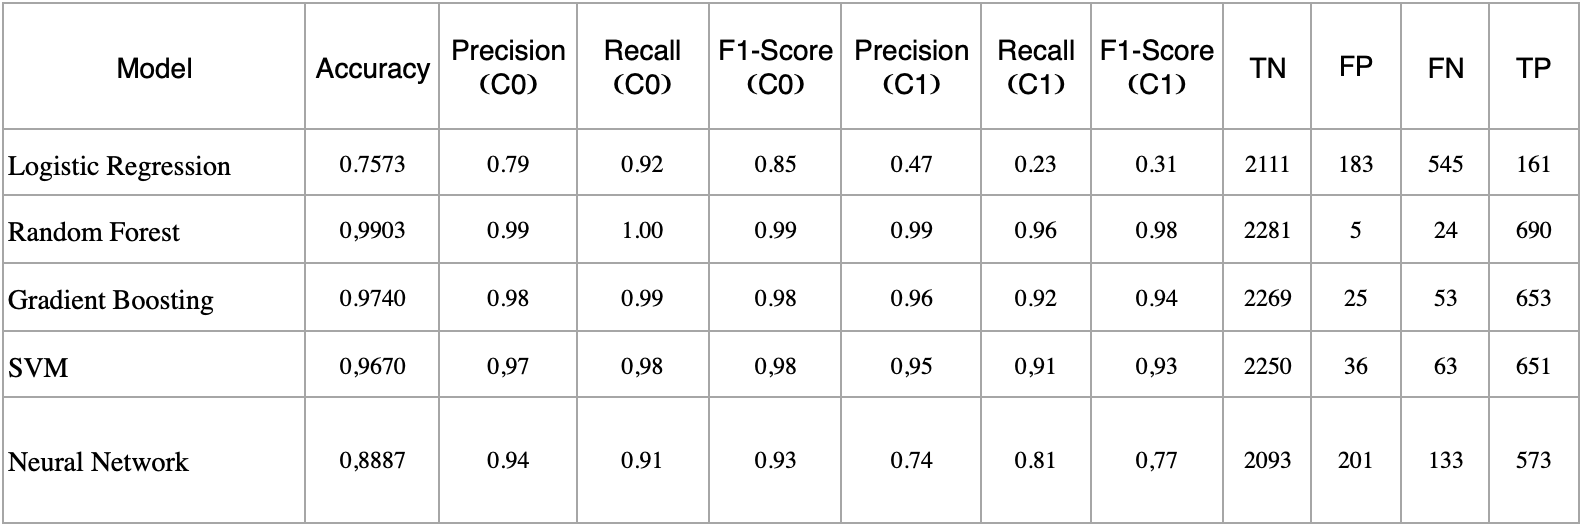

## Model conclusions
Based on the classification results(class 0_stayed,class 1_left) for the different models, the following conclusions can be drawn:

**Logistic Regression :**

Accuracy: 75.73%

Problems with class 1 prediction: low precision (0.47) and recall (0.23), indicating that the model often misses positive examples (class 1_left).

**Gradient Boosting:**

Accuracy: 97.40%
The model shows good results in both categories, especially high precision (0.98) and recall (0.99)
for class 0 and strong 0.96 and 0.92 for class 1, respectively.

**Random Forest:**

Accuracy: 98.87%
It is the most powerful model among the presented ones, with excellent performance for both class 0 and class 1 (precision = 0.99 and recall = 0.96 for class 1).

**Support Vector Machine (SVM):**
Accuracy: 78,43%
The results are comparable to logistic regression, also remembers 1st grade very poorly - misses most of the remaining work,

**Neural Network:**
Accuracy: 91,70%
The results show slight differences from SVM. Neural Network also shows  shows strong performance, particularly on class 1 (those who did not leave), but is slightly inferior to Gradient Boosting and Random Forest.

**General conclusions:**

Random Forest showed the best results in accuracy and reliability for both categories.

Logistic regression requires improvement as its performance on class 1 is significantly lower than other models.

Gradient boosting also proved to be very competitive and is a good choice for this task.
It is recommended to use random forest or gradient boosting for tasks where high prediction accuracy is important, especially on class 1.



## Graphical representation of results


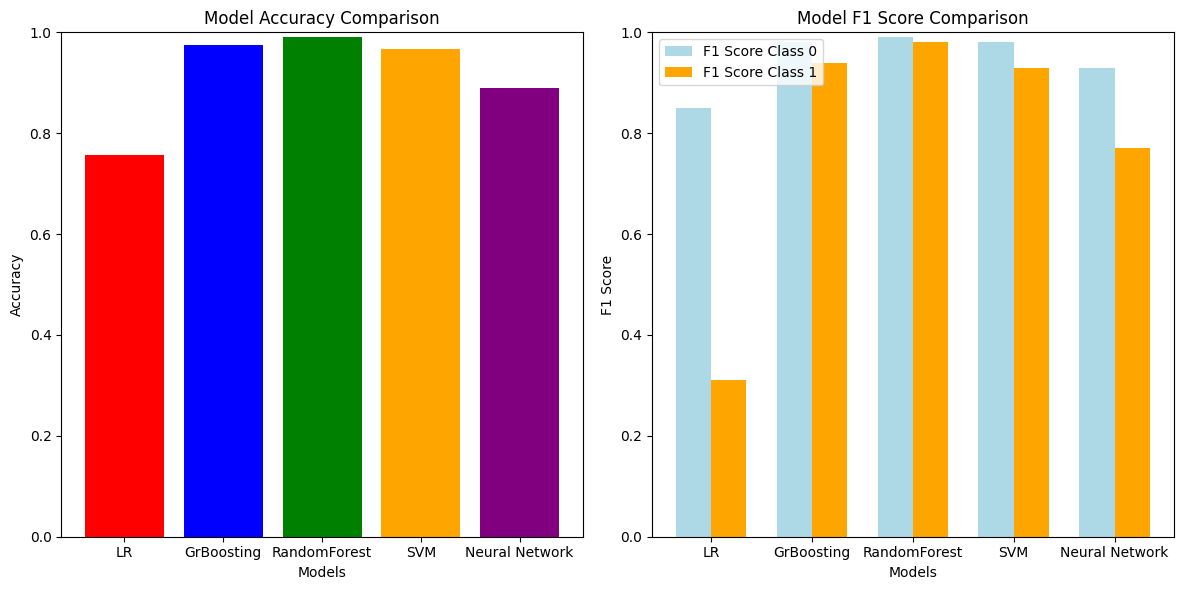

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and data
models = ['LR', 'GrBoosting', 'RandomForest', 'SVM', 'Neural Network']
accuracy = [0.7573, 0.9740, 0.9903, 0.9670, 0.8887]
f1_scores_class_0 = [0.85, 0.98, 0.99, 0.98, 0.93]
f1_scores_class_1 = [0.31, 0.94, 0.98, 0.93, 0.77]

x = np.arange(len(models))

# Create a bar chart for Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(x, accuracy, color=['red', 'blue', 'green', 'orange', 'purple'])
plt.xticks(x, models)
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Create a bar chart for F1-Scores
plt.subplot(1, 2, 2)
width = 0.35  # Width of the bars
plt.bar(x - width/2, f1_scores_class_0, width, label='F1 Score Class 0', color='lightblue')
plt.bar(x + width/2, f1_scores_class_1, width, label='F1 Score Class 1', color='orange')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.legend()

plt.tight_layout()
plt.show()

The provided charts compare different models based on their accuracy and F1 scores:

Left chart (Model Accuracy Comparison):

Among the models, Random Forest and GradientBoosting show the highest accuracy, close to 1.0.

The Logistic Regression (LR) has the lowest accuracy but still performs reasonably well.

The Neural Network also performs well, slightly below Random Forest and GradientBoosting.
Right chart (Model F1 Score Comparison):

The F1 Score for class 0 (light blue) is generally higher than for class 1 (orange), indicating the models are more effective at predicting class 0.
Random Forest and GradientBoosting again outperform others,
especially in detecting class 1, with high F1 scores.
The Neural Network's F1 scores are good but slightly lower than the top-performing models.

# Conclusion
During the project, data analysis was performed to predict employee turnover in an organization, in order to identify the main factors influencing employee satisfaction and their decision to leave the company.

Based on various employee attributes such as:
- satisfaction level,
- number of completed projects,
- average number of working hours
- time spent in the company,

a machine learning model was created to predict employee turnover.

Here are **important indicators** when predicting employee turnover:

* satisfaction level;

* time spent in the company.

A decrease in the satisfaction level is directly related to an increase in the probability of employee turnover.

Different **machine learning models** were tested, including:

* logistic regression;

* gradient boosting;

* random forest;

* neural networks.

The best results were obtained using **GradientBoosting** and **RandomForest**, where the accuracy reached **97–99%**.

The following indicators were used to evaluate the performance of the models:

* accuracy;

* precision;

* recall;

* F1 Score;

* Confusion Matrix.

These indicators confirmed that the models were able to effectively classify employees into those who will stay and those who will leave.

##Recommendations:

* pay attention to the satisfaction level of employees;

* conduct regular surveys to monitor changes in satisfaction;

* create programs aimed at employee development and improving working conditions;
* the employer should be advised to constantly monitor employees who are particularly valuable to the company in order to prevent their departure.

The use of the results of this project can significantly help reduce employee turnover, optimize human resource processes, and create a healthier and more productive work environment.